In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# ensemble 위한 분류학습기 추가하기

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import VotingClassifier



from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# 학습데이터
customer_train = pd.read_csv('./data/train.csv')
customer_train.head()
#customer_train.info()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
# 학습데이터
customer_test = pd.read_csv('./data/test.csv')
customer_test.head()
# customer_test.info()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [9]:
# 클래스에 대한 비율확인
print(customer_train['TARGET'].value_counts()) 

# 불만족 비율
unsati_cnt = customer_train[customer_train['TARGET'] == 1]['TARGET'].count() / \
             customer_train['TARGET'].count()
print('unsatisfied ratio : ', unsati_cnt)

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied ratio :  0.0395685345961589


In [39]:
# 결측치
# 데이터 전처리 없이 XGBM을 이용한 예측
# 성능평가를 조기 중단 파라미터를 설정하고 학습/예측/평가
# 하이퍼 파라미터 튜닝을 해보자 - GridSearchCV - 교차검증
# XGBM을 이용한 예측
# 피처 임포턴트 시각화

# stacking model 로 변화하여 성능평가

In [25]:
lb = customer_train['TARGET']
lb

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [27]:
ft = customer_train.iloc[:, :-1]
ft

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [40]:
customer_train.isnull().sum().sum()

0

In [28]:
X_train, X_test, y_train, y_test = train_test_split(ft,
                                                   lb,
                                                   test_size=0.2,
                                                   random_state=100)

In [43]:
xgbm = XGBClassifier(n_estimators=400,
                                     learning_rate=0.2, 
                                     max_depth = 3)

xgbm.fit(X_train, y_train)

XGBClassifier(learning_rate=0.2, n_estimators=400)

In [44]:
y_pred = xgbm.predict(X_test)

In [45]:
def classifier_eval(y_test , y_pred) :
    print('오차행렬 : ' , confusion_matrix(y_test, y_pred))
    print('정확도   : ' , accuracy_score(y_test, y_pred))
    print('정밀도   : ' , precision_score(y_test, y_pred))
    print('재현율   : ' , recall_score(y_test, y_pred))
    print('F1       : ' , f1_score(y_test, y_pred))
    print('AUC      : ' , roc_auc_score(y_test, y_pred))

In [46]:
classifier_eval(y_test, y_pred)

오차행렬 :  [[14575    10]
 [  611     8]]
정확도   :  0.9591554853985793
정밀도   :  0.4444444444444444
재현율   :  0.012924071082390954
F1       :  0.02511773940345369
AUC      :  0.5061192175775342


In [47]:
# 튜닝
# logloss -> 오류에 대한 평가성능지표 리턴 함수

xgbm = XGBClassifier(n_estimators=400,
                                     learning_rate=0.2,
                                     max_depth = 3)
xgbm.fit(X_train, y_train, 
                          early_stopping_rounds=100,
                          eval_metric='logloss',
                          eval_set = [(X_test , y_test)],
                          verbose = True
                         )

[0]	validation_0-logloss:0.538917
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.435781
[2]	validation_0-logloss:0.362724
[3]	validation_0-logloss:0.309342
[4]	validation_0-logloss:0.269479
[5]	validation_0-logloss:0.23927
[6]	validation_0-logloss:0.216248
[7]	validation_0-logloss:0.198482
[8]	validation_0-logloss:0.184888
[9]	validation_0-logloss:0.174331
[10]	validation_0-logloss:0.166129
[11]	validation_0-logloss:0.159905
[12]	validation_0-logloss:0.155074
[13]	validation_0-logloss:0.151267
[14]	validation_0-logloss:0.148436
[15]	validation_0-logloss:0.146218
[16]	validation_0-logloss:0.144494
[17]	validation_0-logloss:0.142931
[18]	validation_0-logloss:0.141864
[19]	validation_0-logloss:0.140858
[20]	validation_0-logloss:0.139965
[21]	validation_0-logloss:0.139466
[22]	validation_0-logloss:0.138988
[23]	validation_0-logloss:0.138479
[24]	validation_0-logloss:0.138049
[25]	validation_0-logloss:0.137589
[26]	validation_0-logloss:0.1373

XGBClassifier(learning_rate=0.2, n_estimators=400)

In [48]:
y_pred167 = xgbm.predict(X_test)
classifier_eval(y_test, y_pred167)

오차행렬 :  [[14583     2]
 [  614     5]]
정확도   :  0.9594843462246777
정밀도   :  0.7142857142857143
재현율   :  0.008077544426494346
F1       :  0.01597444089456869
AUC      :  0.503970208620515


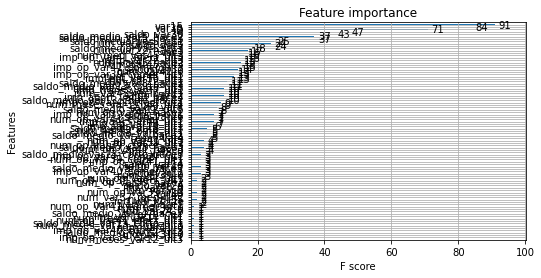

In [49]:
from xgboost import plot_importance

# 피처 중요도 시각화
plot_importance(xgbm)

In [42]:
from sklearn.ensemble import AdaBoostClassifier

# 개별 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=400 , random_state = 100)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=400)